In the notebook `validate_specsim.ipynb`, I compared `specsim` output to CMX data for 

- tile ID = 70502
- date = 20200225
- exp ID = 52113
- spectrograph 0

I found significant discrepancies in the noise levels but David Kirkby suggested in [specsim issue #110](https://github.com/desihub/specsim/issues/110) that this may be caused by transparency and fiber acceptance fraction. In this notebook we'll take a look at the transparencies

In [1]:
import os 
import fitsio
import numpy as np 

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

read in GFA observing conditions compiled by Aaron

In [3]:
fgfa = os.path.join('/global/cfs/cdirs/desi/users/ameisner/GFA/conditions', 'offline_all_guide_ccds_thru_20200315.fits')
gfa = fitsio.read(fgfa)

In [4]:
np.sort(gfa.dtype.names)

array(['AIRMASS', 'APER_CORR_FAC', 'APPLY_DARK_RESCALE_FACTOR', 'CAMERA',
       'CD', 'CDELT', 'CONTRAST', 'CRPIX', 'CRVAL', 'CTYPE', 'CUBE_INDEX',
       'DARK_RESCALE_CONVERGED', 'DARK_RESCALE_FACTORS_PER_AMP',
       'DARK_RESCALE_FACTOR_ADOPTED', 'DARK_RESCALE_FACTOR_BESTFIT',
       'DARK_RESCALE_NCALLS', 'DARK_TEMP_SCALING_FACTOR', 'DECCEN',
       'DOMSHUTL', 'DOMSHUTU', 'DO_FIT_DARK_SCALING', 'EXPID', 'EXPTIME',
       'EXTNAME', 'FIBER_FRACFLUX', 'FNAME_MASTER_DARK', 'FNAME_RAW',
       'FOCUS', 'FWHM_ASEC', 'FWHM_MAJOR_PIX', 'FWHM_MINOR_PIX',
       'FWHM_PIX', 'GITREV', 'LATPOLE', 'LONGPOLE', 'MASTER_DARK_EXPTIME',
       'MASTER_DARK_GCCDTEMP', 'MAX', 'MAX_Q1', 'MAX_Q2', 'MAX_Q3',
       'MAX_Q4', 'MEAN', 'MEAN_Q1', 'MEAN_Q2', 'MEAN_Q3', 'MEAN_Q4',
       'MEDIAN', 'MEDIAN_Q1', 'MEDIAN_Q2', 'MEDIAN_Q3', 'MEDIAN_Q4',
       'MIN', 'MIN_Q1', 'MIN_Q2', 'MIN_Q3', 'MIN_Q4', 'MJD', 'MOONDEC',
       'MOONRA', 'MOON_SEP_DEG', 'NAXIS', 'NIGHT', 'NPIX_BAD_PER_AMP',
       'NPIX_BAD

In [5]:
isexp = (gfa['EXPID'] == 52113)
nearexp = (gfa['MJD'] > 58900) & (gfa['MJD'] < 58910)

(0, 1.1)

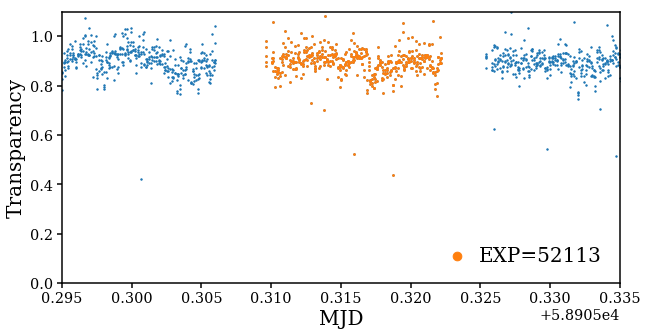

In [6]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)

sub.scatter(gfa['MJD'][nearexp], gfa['TRANSPARENCY'][nearexp], s=2)
sub.scatter(gfa['MJD'][isexp], gfa['TRANSPARENCY'][isexp], s=3, label='EXP=52113')

sub.legend(loc='lower right', fontsize=20, markerscale=5, handletextpad=0.1)
sub.set_xlabel('MJD', fontsize=20)
sub.set_xlim(58905.295, 58905.335)

sub.set_ylabel('Transparency', fontsize=20)
sub.set_ylim(0, 1.1)

(0, 1.1)

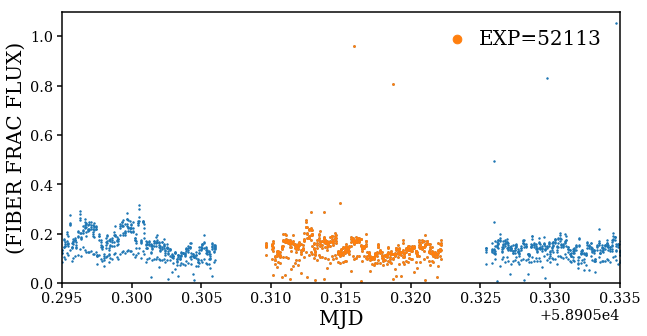

In [7]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)

sub.scatter(gfa['MJD'][nearexp], gfa['FIBER_FRACFLUX'][nearexp], s=2)
sub.scatter(gfa['MJD'][isexp], gfa['FIBER_FRACFLUX'][isexp], s=3, label='EXP=52113')

sub.legend(loc='upper right', fontsize=20, markerscale=5, handletextpad=0.1)
sub.set_xlabel('MJD', fontsize=20)
sub.set_xlim(58905.295, 58905.335)

sub.set_ylabel('(FIBER FRAC FLUX)', fontsize=20)
sub.set_ylim(0, 1.1)

(0, 1.1)

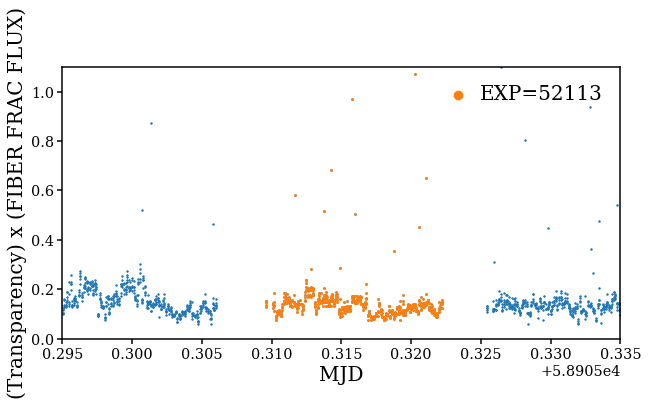

In [8]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)

sub.scatter(gfa['MJD'][nearexp], gfa['TRANSPARENCY'][nearexp] * gfa['FIBER_FRACFLUX'][nearexp], s=2)
sub.scatter(gfa['MJD'][isexp], gfa['TRANSPARENCY'][isexp] * gfa['FIBER_FRACFLUX'][isexp], s=3, label='EXP=52113')

sub.legend(loc='upper right', fontsize=20, markerscale=5, handletextpad=0.1)
sub.set_xlabel('MJD', fontsize=20)
sub.set_xlim(58905.295, 58905.335)

sub.set_ylabel('(Transparency) x (FIBER FRAC FLUX)', fontsize=20)
sub.set_ylim(0, 1.1)

In [9]:
fibloss = gfa['TRANSPARENCY'][isexp] * gfa['FIBER_FRACFLUX'][isexp]
print(np.median(fibloss[~np.isnan(fibloss)]))

0.13325256962932455
